In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [445]:
urlfile="https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv"

In [446]:
df_1=pd.read_csv(urlfile)

In [4]:
#shape
df_1.shape

(8523, 12)

# Initial Inspection

In [5]:
df_1.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [6]:
df_1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# There are missing values in 2 columns

In [12]:
df=df_1.copy()

In [14]:
continuous_cols=df[[x for x in df.columns if df[x].nunique()>20]]

In [15]:
continuous_cols.head(2)

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,FDA15,9.30,0.016047,249.8092,3735.1380
1,DRC01,5.92,0.019278,48.2692,443.4228


In [16]:
categorical_cols=df[[x for x in df.columns if df[x].nunique()<20]]

## 1. Primary Inspection and Exploratory Data Analysis on Categorical Columns.

In [17]:
categorical_cols.head(2)

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,OUT018,2009,Medium,Tier 3,Supermarket Type2


In [18]:
for i in categorical_cols.columns:
    print('Unique Values For :',i)
    print(categorical_cols[i].unique())

Unique Values For : Item_Fat_Content
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Unique Values For : Item_Type
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Unique Values For : Outlet_Identifier
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Unique Values For : Outlet_Establishment_Year
[1999 2009 1998 1987 1985 2002 2007 1997 2004]
Unique Values For : Outlet_Size
['Medium' nan 'High' 'Small']
Unique Values For : Outlet_Location_Type
['Tier 1' 'Tier 3' 'Tier 2']
Unique Values For : Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


### It can be seen that there are words in the Item_fat column that have same meaning but different letter formattings

##  It can be seen that the Item_Fat_Content column has same categories with different formattings. Also there are nan values in the 'Outlet_Size' column. 

In [19]:
df['Outlet_Size'].isna().sum()

2410

In [20]:
df['Item_Fat_Content']=df['Item_Fat_Content'].apply(lambda x:'Low Fat' if x in ['low fat','LF'] else ('Regular' if x in ['reg'] else x))

In [21]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


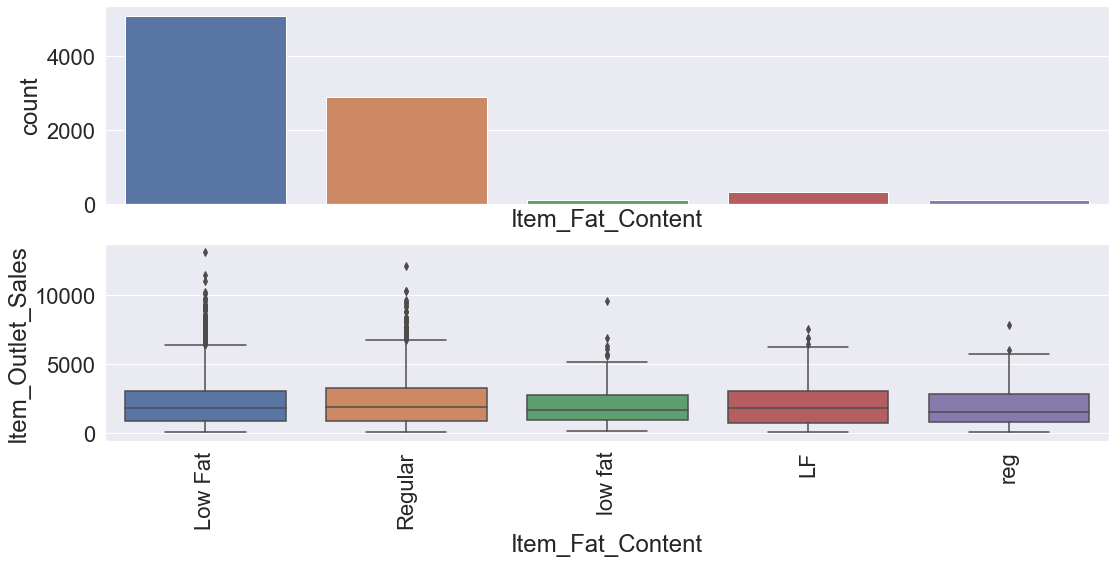

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


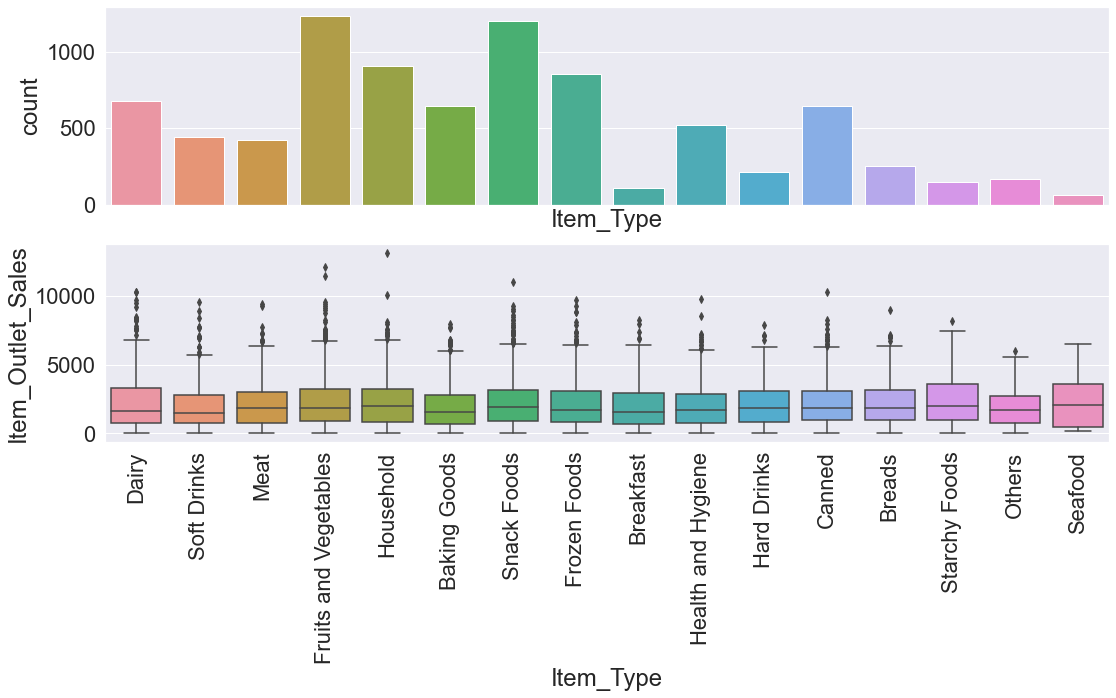

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


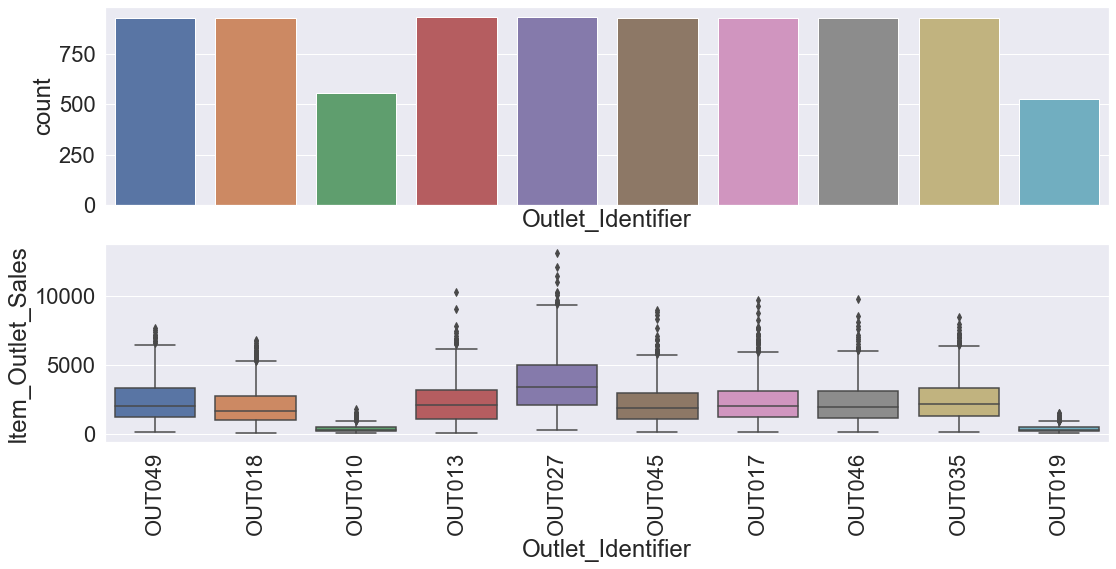

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


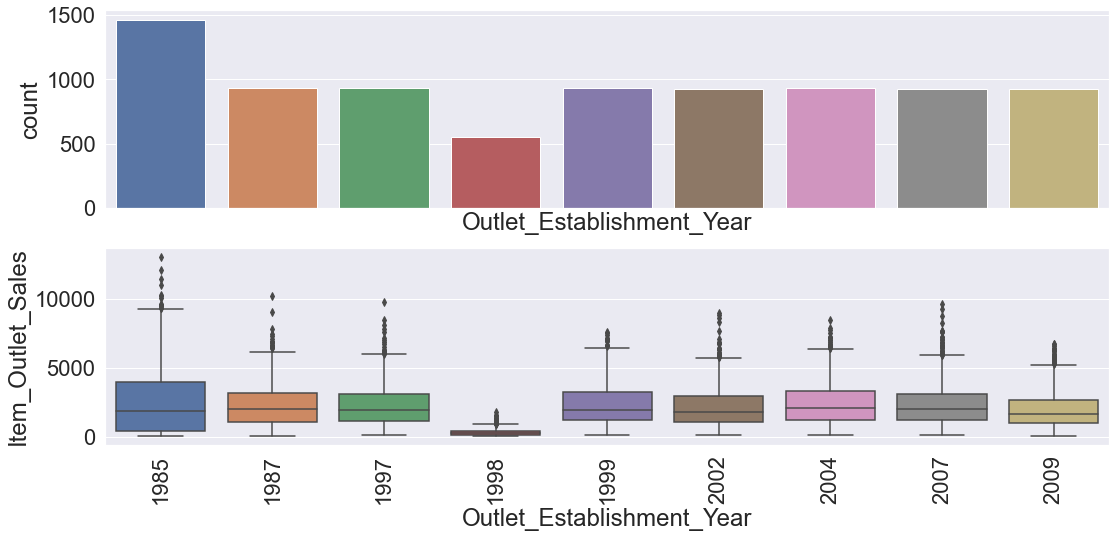

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


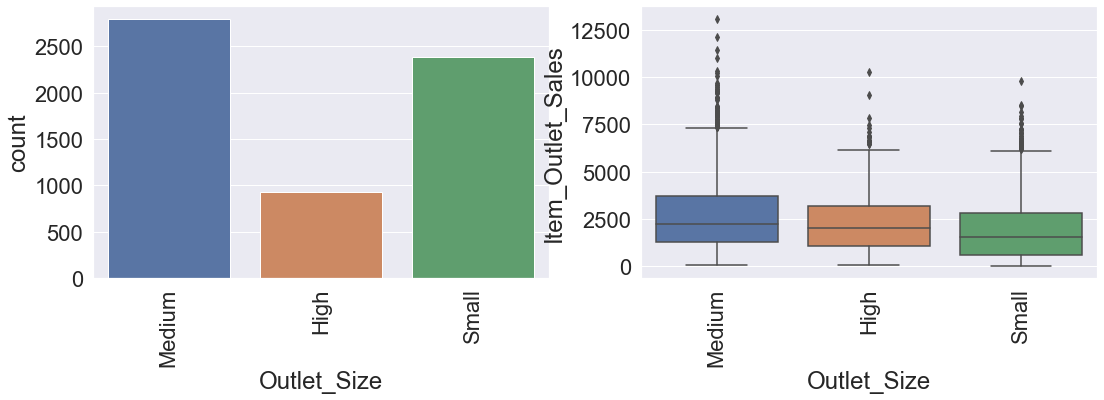

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


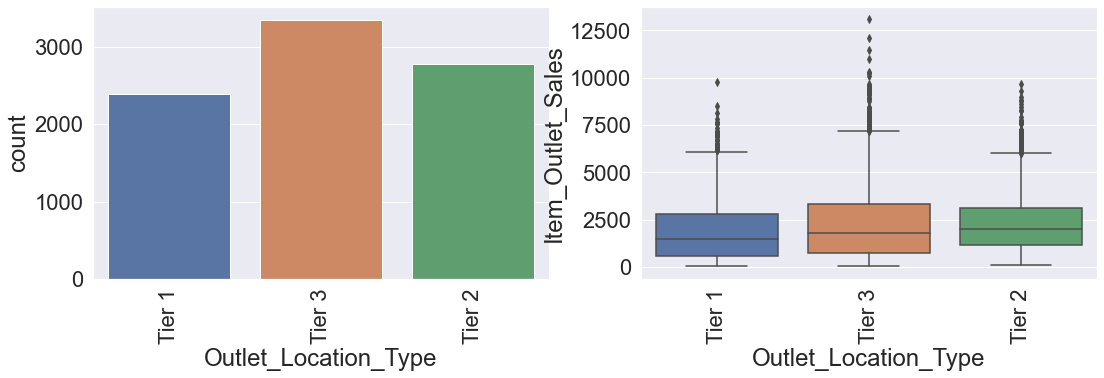

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


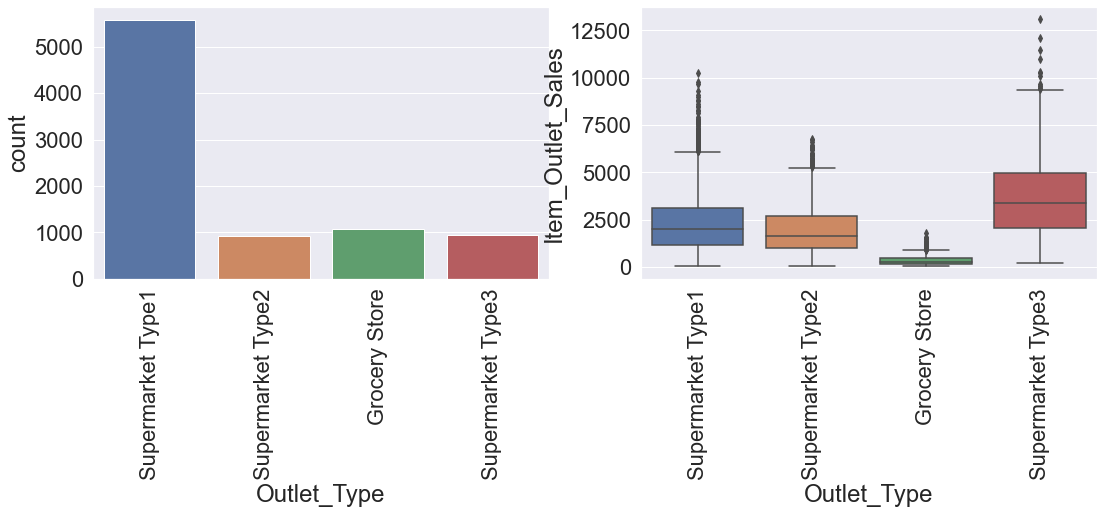

In [443]:
# for i in categorical_cols.columns:
#     if df[i].nunique()>5:
#         plt.figure(figsize=(15,5))
#         sns.countplot(df[i])
#         plt.xticks(rotation=45)
#         plt.show()
#     else:
#         plt.figure(figsize=(6,5))
#         sns.countplot(df[i])
#         plt.xticks(rotation=45)
#         plt.show()
for i in categorical_cols.columns:
    if df_1[i].nunique()>=5:
        fig, axes = plt.subplots(2, 1, figsize=(18,8),sharex=True)
        sns.countplot(df_1[i],ax=axes[0])
        axes[0].tick_params(axis='x', rotation=90)
        sns.boxplot(ax=axes[1],x=df_1[i],y=df_1['Item_Outlet_Sales'])
        axes[1].tick_params(axis='x', rotation=90)
        plt.show()
    else:
        fig, axes = plt.subplots(1, 2, sharex=True, figsize=(18,5))
        sns.countplot(df_1[i],ax=axes[0])
        axes[0].tick_params(axis='x', rotation=90)
        sns.boxplot(x=df_1[i],y=df_1['Item_Outlet_Sales'],ax=axes[1])
        axes[1].tick_params(axis='x', rotation=90)
        plt.show()

In [24]:
df=pd.get_dummies(data=df, columns=['Item_Type','Item_Fat_Content','Outlet_Type'],drop_first=True)

In [25]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_Breads,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Item_Fat_Content_Regular,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0.016047,249.8092,OUT049,1999,Medium,Tier 1,3735.1380,0,...,0,0,0,0,0,0,0,1,0,0
1,DRC01,5.92,0.019278,48.2692,OUT018,2009,Medium,Tier 3,443.4228,0,...,0,0,0,0,1,0,1,0,1,0


In [26]:
df.drop(columns=['Item_Identifier','Outlet_Size','Outlet_Identifier'],inplace=True)

In [27]:
df.shape

(8523, 25)

In [28]:
df['Outlet_Location_Type']=df['Outlet_Location_Type'].apply(lambda x: 1 if x in 'Tier 1' else (2 if x in 'Tier 2' else 3))

## 1. Primary Inspection and Exploratory Data Analysis on Continuous Columns.

In [30]:
continuous_cols.head(2)

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,FDA15,9.30,0.016047,249.8092,3735.1380
1,DRC01,5.92,0.019278,48.2692,443.4228


In [31]:
cont_cols=df[[x for x in df.columns if x  in list(continuous_cols.columns)]]

In [32]:
#cont_cols.drop(columns='Item_Identifier',inplace=True)

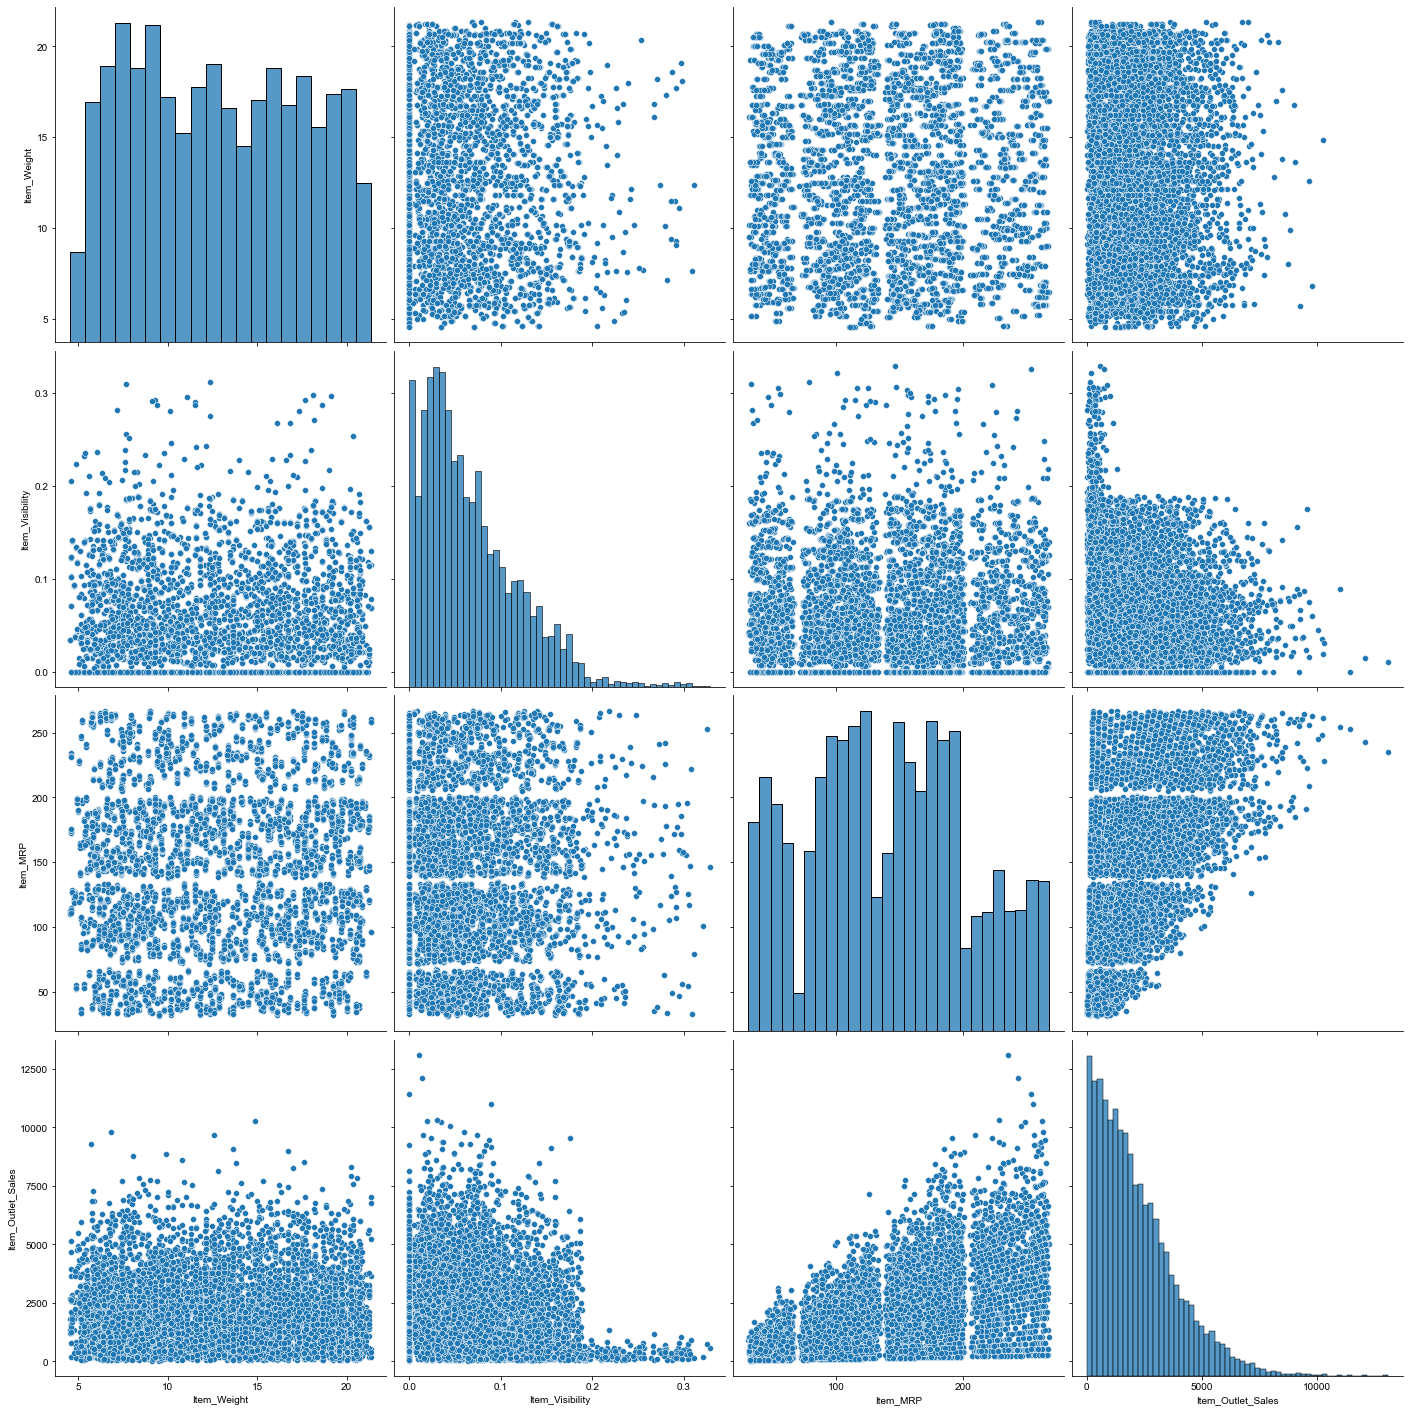

In [33]:
sns.pairplot(cont_cols,height=5)
sns.set(font_scale=2)


### Observation: There is no linear relationship between the Item_Outlet_Sales and Item_Weight features.

In [34]:
cont_cols.corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.567574
Item_Outlet_Sales,0.014123,-0.128625,0.567574,1.000000


### We can drop the Item_Weight column

In [35]:
df.drop(columns=['Item_Weight'],inplace=True)

In [36]:
df.head(2)

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Item_Fat_Content_Regular,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.016047,249.8092,1999,1,3735.1380,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0.019278,48.2692,2009,3,443.4228,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0


In [37]:
#df.drop(columns='Item_Identifier',inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Visibility                  8523 non-null   float64
 1   Item_MRP                         8523 non-null   float64
 2   Outlet_Establishment_Year        8523 non-null   int64  
 3   Outlet_Location_Type             8523 non-null   int64  
 4   Item_Outlet_Sales                8523 non-null   float64
 5   Item_Type_Breads                 8523 non-null   uint8  
 6   Item_Type_Breakfast              8523 non-null   uint8  
 7   Item_Type_Canned                 8523 non-null   uint8  
 8   Item_Type_Dairy                  8523 non-null   uint8  
 9   Item_Type_Frozen Foods           8523 non-null   uint8  
 10  Item_Type_Fruits and Vegetables  8523 non-null   uint8  
 11  Item_Type_Hard Drinks            8523 non-null   uint8  
 12  Item_Type_Health and

In [39]:
X=df.drop(columns='Item_Outlet_Sales')

## Checking For Multicolliniearity

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [41]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                            feature        VIF
0                   Item_Visibility   2.908302
1                          Item_MRP   6.204235
2         Outlet_Establishment_Year  39.792936
3              Outlet_Location_Type  11.741110
4                  Item_Type_Breads   1.389593
5               Item_Type_Breakfast   1.173064
6                  Item_Type_Canned   2.005728
7                   Item_Type_Dairy   2.067691
8            Item_Type_Frozen Foods   2.325597
9   Item_Type_Fruits and Vegetables   2.913802
10            Item_Type_Hard Drinks   1.363699
11     Item_Type_Health and Hygiene   1.885559
12              Item_Type_Household   2.559225
13                   Item_Type_Meat   1.663476
14                 Item_Type_Others   1.287626
15                Item_Type_Seafood   1.099620
16            Item_Type_Snack Foods   2.870400
17            Item_Type_Soft Drinks   1.718415
18          Item_Type_Starchy Foods   1.231226
19         Item_Fat_Content_Regular   1.878600
20    Outlet_

### We can drop the Outlet_Establishment_Year  column as it has a VIF value of 39.

In [42]:
df.drop(columns=['Outlet_Establishment_Year'],inplace=True)

In [43]:
df['Item_Visibility']=df['Item_Visibility'].apply(np.log1p)

In [44]:
#df['Item_Outlet_Sales']=df['Item_Outlet_Sales'].apply(np.log1p)

In [45]:
df.corr()

,Item_Visibility,Item_MRP,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Item_Fat_Content_Regular,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
Item_Visibility,1.000000,-0.000701,-0.027210,-0.125600,0.000866,0.044090,0.010816,0.036394,-0.002417,0.019072,...,-0.017907,-0.016509,0.014593,0.006030,-0.010062,0.003456,0.048045,-0.140401,-0.033874,-0.050233
Item_MRP,-0.000701,1.000000,0.000232,0.567574,-0.000112,0.001460,-0.005666,0.035551,-0.013358,0.023688,...,-0.004086,-0.018595,0.001186,0.033817,-0.035808,0.014613,0.006063,0.004885,0.003850,-0.006714
Outlet_Location_Type,-0.027210,0.000232,1.000000,0.089367,0.003987,-0.000532,-0.000138,-0.010098,-0.009422,0.008188,...,0.003999,-0.014576,-0.005391,-0.001845,-0.001446,0.006957,-0.001598,-0.472793,0.381559,0.383172
Item_Outlet_Sales,-0.125600,0.567574,0.089367,1.000000,0.002332,-0.004656,0.007387,0.008858,-0.009482,0.025950,...,-0.002995,-0.021267,0.007380,0.022782,-0.024040,0.015039,0.018719,0.108765,-0.038059,0.311192
Item_Type_Breads,0.000866,-0.000112,0.003987,0.002332,1.000000,-0.019918,-0.050010,-0.051373,-0.058204,-0.071605,...,-0.039906,-0.024776,-0.015152,-0.070514,-0.040885,-0.023156,0.032643,-0.006189,-0.000734,0.007693
Item_Type_Breakfast,0.044090,0.001460,-0.000532,-0.004656,-0.019918,1.000000,-0.032828,-0.033723,-0.038207,-0.047004,...,-0.026195,-0.016264,-0.009946,-0.046288,-0.026838,-0.015201,0.065711,-0.008695,0.000077,-0.003550
Item_Type_Canned,0.010816,-0.005666,-0.000138,0.007387,-0.050010,-0.032828,1.000000,-0.084670,-0.095929,-0.118015,...,-0.065770,-0.040834,-0.024972,-0.116217,-0.067383,-0.038165,0.073235,0.001236,0.010418,0.001136
Item_Type_Dairy,0.036394,0.035551,-0.010098,0.008858,-0.051373,-0.033723,-0.084670,1.000000,-0.098544,-0.121232,...,-0.067563,-0.041947,-0.025653,-0.119386,-0.069220,-0.039205,0.021236,0.003396,-0.001746,-0.010817
Item_Type_Frozen Foods,-0.002417,-0.013358,-0.009422,-0.009482,-0.058204,-0.038207,-0.095929,-0.098544,1.000000,-0.137352,...,-0.076547,-0.047525,-0.029064,-0.135260,-0.078425,-0.044418,0.085041,0.009750,-0.001507,-0.006128
Item_Type_Fruits and Vegetables,0.019072,0.023688,0.008188,0.025950,-0.071605,-0.047004,-0.118015,-0.121232,-0.137352,1.000000,...,-0.094171,-0.058467,-0.035755,-0.166402,-0.096481,-0.054645,0.116955,-0.000811,0.000919,0.005173


In [46]:
X=df.drop(columns='Item_Outlet_Sales')
y=df['Item_Outlet_Sales']

In [47]:
X.shape, y.shape

((8523, 22), (8523,))

In [48]:
y.unique()

array([3735.138 ,  443.4228, 2097.27  , ..., 7182.6504, 3608.636 ,
       2778.3834])

## Applying The Model

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score

In [50]:
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=50)

In [51]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [52]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [55]:
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)

In [56]:
mean_squared_error(y_train,y_train_pred)

1284313.1986784523

In [58]:
r2_score(y_train,y_train_pred)

0.5616090180243907

In [60]:
r2_score(y_test,y_test_pred)

0.5634340353829281

# 2. Lasso with GridSearchCV

In [61]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [62]:
parameters={'alpha':[0.1,0.01,0.001,1,10,100,0.0001], 'random_state':range(1,10)}
lasso_lr=Lasso()
gscv=GridSearchCV(lasso_lr,param_grid=parameters, cv=5)
gscv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.1, 0.01, 0.001, 1, 10, 100, 0.0001],
                         'random_state': range(1, 10)})

In [65]:
gscv.best_params_

{'alpha': 10, 'random_state': 1}

In [64]:
y_train_pred=gscv.predict(X_train)
y_test_pred=gscv.predict(X_test)

In [66]:
r2_score(y_train,y_train_pred)

0.5608353196907891

In [67]:
r2_score(y_test,y_test_pred)

0.5650571510811697

In [68]:
lr=Lasso(alpha=0.01)
lr.fit(X_train,y_train)

Lasso(alpha=0.01)

In [69]:
lr.coef_

array([-1.09470547e+01,  9.63911217e+02,  5.33882165e+00, -7.12661134e+00,
       -1.94596279e+01, -3.08498261e+00, -1.97848846e+01, -1.46210714e+01,
        9.72465155e+00,  4.49338003e+00, -9.89319262e-01, -2.00408785e+01,
       -9.39689050e+00, -1.55548925e+00,  2.96669970e+01, -1.97354374e+01,
       -1.15752918e+01,  3.02377819e+00,  2.90678738e+01,  9.26261807e+02,
        4.98900163e+02,  1.05727847e+03])

In [70]:
columns_to_r=pd.DataFrame(zip(X.columns,lr.coef_), columns=['Columns','Coefficients'])

In [71]:
columns_to_keep=columns_to_r[columns_to_r['Coefficients']!=0]['Columns']

In [73]:
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)

# 3. Decision Tree

In [75]:
from sklearn.tree import DecisionTreeRegressor

In [325]:
dt=DecisionTreeRegressor(criterion='mse',max_depth=8,random_state=42,max_features=13,min_samples_split=3,ccp_alpha=3)
dt.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=3, max_depth=8, max_features=13,
                      min_samples_split=3, random_state=42)

In [326]:
y_train_pred=dt.predict(X_train)
y_test_pred=dt.predict(X_test)

In [327]:
r2_score(y_train,y_train_pred)

0.619351010017364

In [328]:
r2_score(y_test,y_test_pred)

0.5607443560060513

## 4. XGBoost Regressor

In [ ]:
#! pip install xgboost

In [329]:
from xgboost import XGBRFRegressor

In [440]:
regressor_xgb = XGBRFRegressor(max_depth=8,random_state=42,min_child_weight=10,subsample=0.5)
regressor_xgb.fit(X_train, y_train)
y_train_pred = regressor_xgb.predict(X_train)
y_test_pred = regressor_xgb.predict(X_test)
round(r2_score(y_train, y_train_pred),4)


0.6394

In [441]:
round(r2_score(y_test, y_test_pred),4)

0.6015

# Conclusion: XGBoost gives us the highest r2 score of 0.60 for test set